In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.0 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 20.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [geopandas]/5 [geopandas]


In [ ]:
print(os.getcwd())
%cd ../../..

/Users/elizagoler/Documents/senior-thesis/source/derived/regional_employment


In [4]:
ca_df = pd.read_csv("datastore/raw/BEA_county_employment_1969-00/data/CA25_CA.csv")

In [5]:
ca_df.head()

,FIPS,Region,Table,LineCode,FirstYear,LineTitle,AreaName,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,06000,8.0,CA25,10.0,1969.0,Total full-time and part-time employment,California state total,9032738,9056897,9036074,...,16750052,16390983,16367123,16540726,16939793,17341996,17667117,18370580,18860138,19466162
1,06000,8.0,CA25,20.0,1969.0,Wage and salary employment,California state total,7899113,7892973,7848156,...,13602982,13315592,13193830,13296363,13578082,13904839,14215406,14746956,15179480,15621983
2,06000,8.0,CA25,40.0,1969.0,Proprietors employment,California state total,1133625,1163924,1187918,...,3147070,3075391,3173293,3244363,3361711,3437157,3451711,3623624,3680658,3844179
3,06000,8.0,CA25,50.0,1969.0,Farm proprietors employment,California state total,77221,76472,77084,...,87331,86719,89411,88583,89592,88546,89973,89428,88329,88324
4,06000,8.0,CA25,60.0,1969.0,Nonfarm proprietors employment 2/,California state total,1056404,1087452,1110834,...,3059739,2988672,3083882,3155780,3272119,3348611,3361738,3534196,3592329,3755855


In [ ]:
# Filtering to only those rows where "LineTitle" is exactly "Wage and salary employment"
ca_wage_salary_df = ca_df[ca_df["LineTitle"].astype(str).str.strip() == "Wage and salary employment"]

       FIPS  Region Table  LineCode  FirstYear                     LineTitle  \
1     06000     8.0  CA25      20.0     1969.0    Wage and salary employment   
24    06001     8.0  CA25      20.0     1969.0    Wage and salary employment   
47    06003     8.0  CA25      20.0     1969.0    Wage and salary employment   
70    06005     8.0  CA25      20.0     1969.0    Wage and salary employment   
93    06007     8.0  CA25      20.0     1969.0    Wage and salary employment   
116   06009     8.0  CA25      20.0     1969.0    Wage and salary employment   
139   06011     8.0  CA25      20.0     1969.0    Wage and salary employment   
162   06013     8.0  CA25      20.0     1969.0    Wage and salary employment   
185   06015     8.0  CA25      20.0     1969.0    Wage and salary employment   
208   06017     8.0  CA25      20.0     1969.0    Wage and salary employment   
231   06019     8.0  CA25      20.0     1969.0    Wage and salary employment   
254   06021     8.0  CA25      20.0     

In [16]:
ca_wage_salary_df.head()

,FIPS,Region,Table,LineCode,FirstYear,LineTitle,AreaName,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
1,06000,8.0,CA25,20.0,1969.0,Wage and salary employment,California state total,7899113,7892973,7848156,...,13602982,13315592,13193830,13296363,13578082,13904839,14215406,14746956,15179480,15621983
24,06001,8.0,CA25,20.0,1969.0,Wage and salary employment,"Alameda, CA",445777,447098,438505,...,629580,623436,624031,631913,653636,663204,673976,692225,712986,740172
47,06003,8.0,CA25,20.0,1969.0,Wage and salary employment,"Alpine, CA",164,175,197,...,605,479,635,751,1038,1121,1167,1183,1186,1122
70,06005,8.0,CA25,20.0,1969.0,Wage and salary employment,"Amador, CA",3632,3691,3831,...,9173,9402,9496,9445,10305,10250,9879,10443,10534,11530
93,06007,8.0,CA25,20.0,1969.0,Wage and salary employment,"Butte, CA",26736,27731,28598,...,66266,66011,65233,66927,68208,70240,71499,72703,74880,76785


In [20]:
# Coerce all year columns to integer, since they represent job numbers and need to allow arithmetic
year_cols = [col for col in ca_wage_salary_df.columns if col.isdigit()]
ca_wage_salary_df[year_cols] = ca_wage_salary_df[year_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/3944694803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_wage_salary_df[year_cols] = ca_wage_salary_df[year_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [26]:
# The warning is a SettingWithCopyWarning. 
# It says that setting ca_wage_salary_df["1973-75_change"] = ... might not actually modify
# the original DataFrame if ca_wage_salary_df is a view (not a copy) of another DataFrame (ca_df).
# This can cause unpredictable bugs where your operation does not persist.
# To avoid the warning, use .loc explicitly, or create a copy:

# Using .loc to make it explicit:
ca_wage_salary_df.loc[:, "1973-75_change"] = ca_wage_salary_df["1975"] - ca_wage_salary_df["1973"]
ca_wage_salary_df.loc[:, "1980-82_change"] = ca_wage_salary_df["1982"] - ca_wage_salary_df["1980"]

# Or, if you specifically want to avoid any SettingWithCopyWarning, make a copy up front:
# ca_wage_salary_df = ca_wage_salary_df.copy()
# ca_wage_salary_df["1973-75_change"] = ca_wage_salary_df["1975"] - ca_wage_salary_df["1973"]


/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/643952288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_wage_salary_df.loc[:, "1980-82_change"] = ca_wage_salary_df["1982"] - ca_wage_salary_df["1980"]


In [33]:
# Display all columns in the DataFrame without truncation
share_7375_negative = (ca_wage_salary_df["1973-75_change"] < 0).mean()
share_8082_negative = (ca_wage_salary_df["1980-82_change"] < 0).mean()
print("Share of negative values in 1973-75_change:", share_7375_negative)
print("Share of negative values in 1980-82_change:", share_8082_negative)

Share of negative values in 1973-75_change: 0.0847457627118644
Share of negative values in 1980-82_change: 0.6101694915254238


In [50]:
# Calculate the log change columns as specified
ca_wage_salary_df["1973-75_log_change"] = np.log(ca_wage_salary_df["1973-75_change"] / ca_wage_salary_df["1973"])
ca_wage_salary_df["1980-82_log_change"] = np.log(ca_wage_salary_df["1980-82_change"] / ca_wage_salary_df["1980"])


/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/2588203429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_wage_salary_df["1973-75_log_change"] = np.log(ca_wage_salary_df["1973-75_change"] / ca_wage_salary_df["1973"])
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/2588203429.py:3: SettingWithCopyWarni

In [ ]:
us_state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
    'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
    'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
    'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',
    'WY'
]

dataframes = []
data_dir = 'datastore/raw/bea_county_employment_1969-00/data'

for state_abbr in us_state_abbreviations:
    filename = f'CA25_{state_abbr}'
    filepath = os.path.join(data_dir, filename)
    # Try reading as .csv, but if file doesn't have an extension, just try the filename.
    if os.path.exists(filepath + '.csv'):
        df = pd.read_csv(filepath + '.csv')
    elif os.path.exists(filepath):
        df = pd.read_csv(filepath)
    else:
        # Optionally, skip or raise an error if not found.
        print(f"Warning: File for {state_abbr} not found.")
        continue
    dataframes.append(df)

all_states_df = pd.concat(dataframes, ignore_index=True)

In [51]:
# Ensure all year columns are type int
year_cols = [col for col in all_states_df.columns if col.isdigit()]
all_states_df[year_cols] = all_states_df[year_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Add the '1973-75 change' column
all_states_df["1973-75_change"] = all_states_df["1975"] - all_states_df["1973"]

# Add the '1980-82 change' column
all_states_df["1980-82_change"] = all_states_df["1982"] - all_states_df["1980"]

# Calculate the log change columns as specified
all_states_df["1973-75_log_change"] = np.log(all_states_df["1973-75_change"] / all_states_df["1973"])
all_states_df["1980-82_log_change"] = np.log(all_states_df["1980-82_change"] / all_states_df["1980"])

/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [52]:
all_states_df.columns

Index(['FIPS', 'Region', 'Table', 'LineCode', 'FirstYear', 'LineTitle',
       'AreaName', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '1973-75_change', '1980-82_change', 'FIPS_str', '1973-75_log_change',
       '1980-82_log_change'],
      dtype='object')

In [ ]:
# Calculate the share of rows where 1973-75_change < 0
share_1973_75_neg = (all_states_df["1973-75_change"] < 0).mean()
print(f"Share of rows with 1973-75_change < 0: {share_1973_75_neg:.4f}")

# Calculate the share of rows where 1980-82_change < 0
share_1980_82_neg = (all_states_df["1980-82_change"] < 0).mean()
print(f"Share of rows with 1980-82_change < 0: {share_1980_82_neg:.4f}")

Share of rows with 1973-75_change < 0: 0.4170
Share of rows with 1980-82_change < 0: 0.4971


In [ ]:
all_states_df["1973_75_lchange"] = np.log(all_states_df["1975"]) - np.log(all_states_df["1973"])
all_states_df["1980_82_lchange"] = np.log(all_states_df["1982"]) - np.log(all_states_df["1980"])

/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [57]:
#Severity metric is the opposite of the log change
#So, if the log change is -0.5, the severity is 0.5
all_states_df["1973_75_severity"] = -all_states_df["1973_75_lchange"]
all_states_df["1980_82_severity"] = -all_states_df["1980_82_lchange"]
all_states_df.columns

Index(['FIPS', 'Region', 'Table', 'LineCode', 'FirstYear', 'LineTitle',
       'AreaName', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '1973-75_change', '1980-82_change', 'FIPS_str', '1973-75_log_change',
       '1980-82_log_change', '1973_75_lchange', '1980_82_lchange',
       '1973_75_severity', '1980_82_severity'],
      dtype='object')

In [59]:
top10_severity = all_states_df.nlargest(10, '1973_75_severity')
print(top10_severity)


        FIPS  Region Table  LineCode  FirstYear                LineTitle  \
8675   12047     5.0  CA25     200.0     1969.0                   Mining   
10494  13069     5.0  CA25     200.0     1969.0                   Mining   
10866  13101     5.0  CA25     610.0     1969.0          Wholesale trade   
11782  13181     5.0  CA25     200.0     1969.0                   Mining   
14594  17003     3.0  CA25     200.0     1969.0                   Mining   
31542  27017     4.0  CA25     200.0     1969.0                   Mining   
32347  27087     4.0  CA25     200.0     1969.0                   Mining   
33660  28025     5.0  CA25     200.0     1969.0                   Mining   
41373  31183     4.0  CA25     400.0     1969.0            Manufacturing   
45477  37055     5.0  CA25     200.0     1969.0                   Mining   

             AreaName  1969  1970  1971  ...  2000  1973-75_change  \
8675    Hamilton, FL    626   579   685  ...  <NA>            -730   
10494     Coffee, GA   

In [60]:
all_states_wage_salary = all_states_df[all_states_df["LineTitle"].astype(str).str.strip() == "Wage and salary employment"]

In [73]:
# Show all counties with 'Wage and salary employment', sorted by highest '1973_75_severity'
all_sorted_severity = all_states_wage_salary.sort_values('1973_75_severity', ascending=False)
pd.set_option('display.max_rows', None)
print(
    all_sorted_severity[
        ['FIPS', 'Region', 'Table', 'LineCode', 'FirstYear', 'LineTitle', 'AreaName', '1973_75_severity']
    ]
)
pd.reset_option('display.max_rows')


        FIPS  Region Table  LineCode  FirstYear                     LineTitle  \
2395   02903     8.0  CA25      20.0     1969.0    Wage and salary employment   
58206  47067     5.0  CA25      20.0     1969.0    Wage and salary employment   
59517  47181     5.0  CA25      20.0     1969.0    Wage and salary employment   
69256  53023     8.0  CA25      20.0     1969.0    Wage and salary employment   
54727  44005     1.0  CA25      20.0     1969.0    Wage and salary employment   
1542   01133     5.0  CA25      20.0     1969.0    Wage and salary employment   
36828  29135     4.0  CA25      20.0     1969.0    Wage and salary employment   
57654  47019     5.0  CA25      20.0     1969.0    Wage and salary employment   
26625  22003     5.0  CA25      20.0     1969.0    Wage and salary employment   
9750   13003     5.0  CA25      20.0     1969.0    Wage and salary employment   
11728  13177     5.0  CA25      20.0     1969.0    Wage and salary employment   
43142  35043     6.0  CA25  

In [ ]:
population_df['fips_county_suffix'] = population_df['fips_county_suffix'].apply(lambda x: f"{int(x):03d}")
population_df['state_fips'] = population_df['state_fips'].apply(lambda x: f"{int(x):02d}")

In [ ]:
population_df['fips_county_suffix'] = population_df['fips_county_suffix'].apply(lambda x: f"{int(x):03d}")
population_df['state_fips'] = population_df['state_fips'].apply(lambda x: f"{int(x):02d}")

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/2936957483.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_states_wage_salary['FIPS_str'] = all_states_wage_salary['FIPS'].astype(str).str.zfill(5)


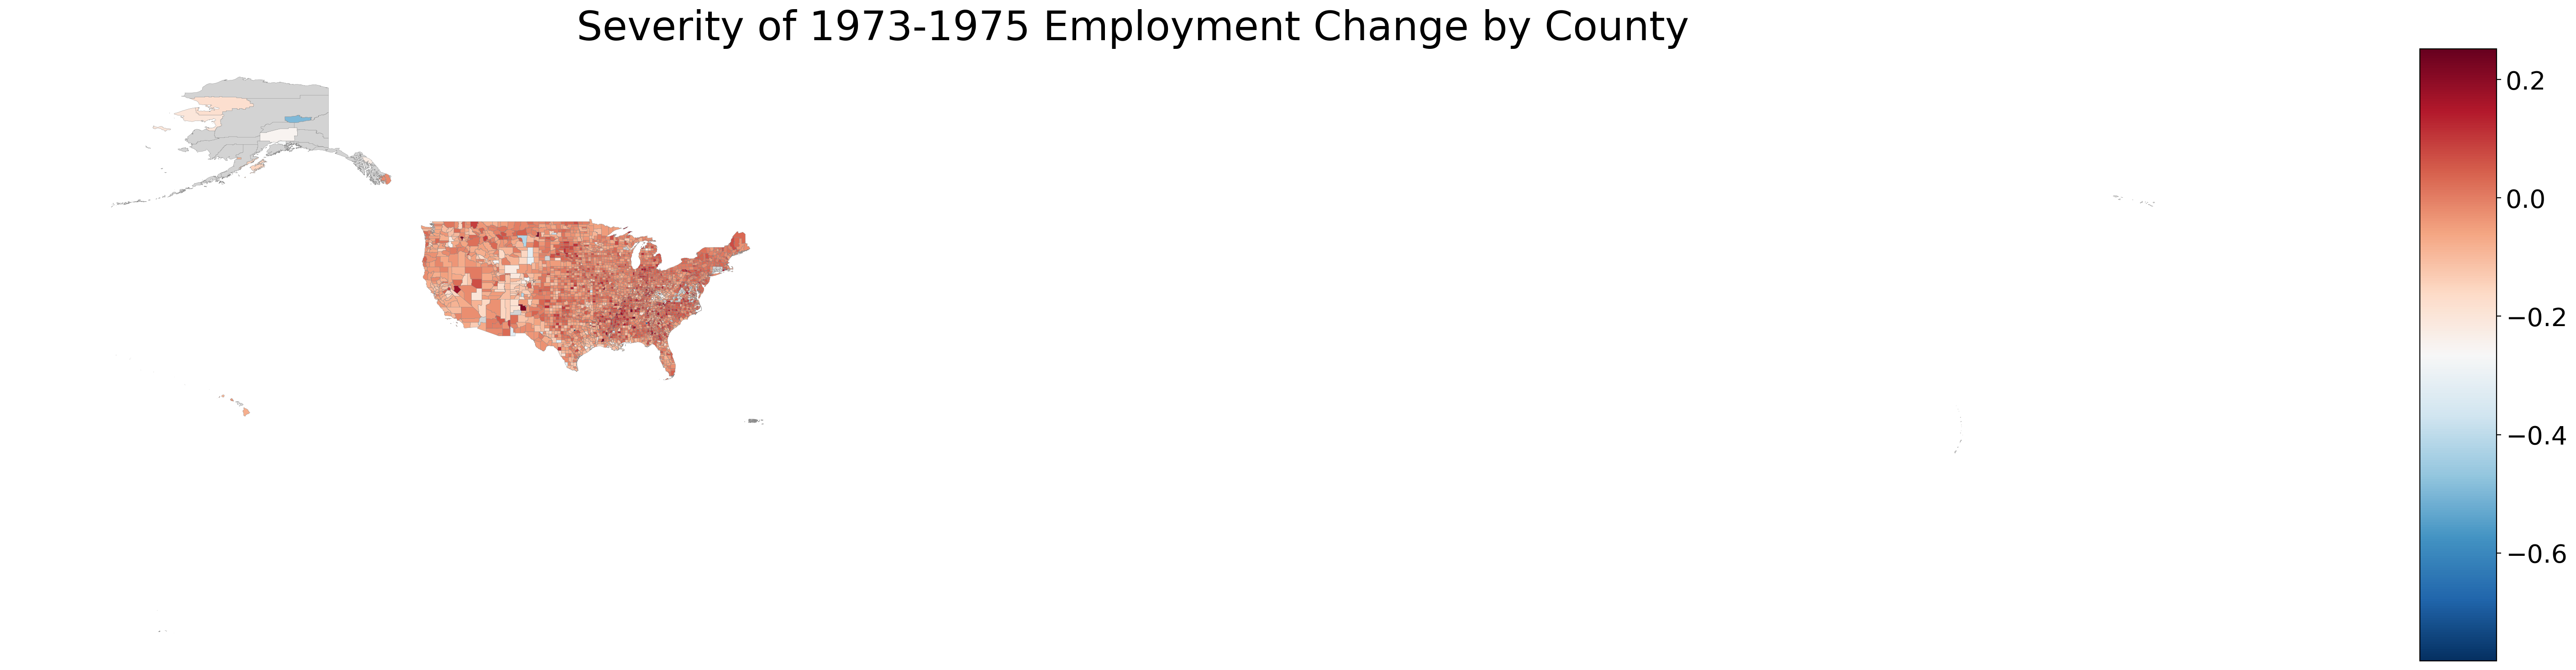

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Use the higher-resolution US Census Bureau 500k county shapefile
county_map = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_500k.zip')

# Ensure FIPS codes are strings and zero-padded to 5 digits
county_map['FIPS'] = county_map['STATEFP'] + county_map['COUNTYFP']
all_states_wage_salary['FIPS_str'] = all_states_wage_salary['FIPS'].astype(str).str.zfill(5)

# Aggregate severity metric if duplicates exist (e.g., use first)
county_severity = all_states_df[['FIPS_str', '1973_75_severity']].drop_duplicates(subset='FIPS_str')

# Merge the county shapefile with severity data
county_map = county_map.merge(county_severity, left_on='FIPS', right_on='FIPS_str', how='left')

# Make a figure with two axes: map and legend, using axes_grid1 for proportion
fig, ax = plt.subplots(figsize=(30, 20), dpi=200)  # Larger and higher DPI for clarity
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # Legend much narrower

# Plot the map on the main axis, turn off built-in legend
county_map_plot = county_map.plot(
    column='1973_75_severity', 
    cmap='RdBu_r',  # FLIPPED colormap
    linewidth=0.15,  # Slightly wider lines for high-res
    ax=ax, 
    edgecolor='grey',
    legend=False,  # We'll add colorbar manually
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Gather the plotted collection for colorbar
norm = plt.Normalize(
    vmin=county_map['1973_75_severity'].min(skipna=True),
    vmax=county_map['1973_75_severity'].max(skipna=True)
)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
sm.set_array([])

# Add a colorbar (legend) manually with small width axis
cbar = fig.colorbar(
    sm,
    cax=cax,
    orientation='vertical',
)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('', size=20)

ax.set_title('Severity of 1973-1975 Employment Change by County', fontsize=32)
ax.axis('off')

plt.tight_layout()
plt.show()
